In [1]:
# Install necessary libraries
!pip install beautifulsoup4 requests pandas matplotlib seaborn scikit-learn
!pip install beautifulsoup4 requests pandas matplotlib seaborn scikit-learn --upgrade
!pip install beautifulsoup4 requests pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.xometry.com/capabilities/cnc-machining/'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Attempt to extract some service headers or pricing content
services = soup.find_all('h2')
print("Sample CNC Services:")
for s in services[:5]:
    print("-", s.text.strip())


Sample CNC Services:


In [3]:
import pandas as pd
import random

# Define sample materials and base cost/time multipliers
materials = {
    'Aluminum': {'cost_per_min': 5, 'base_time': 20},
    'Steel': {'cost_per_min': 6, 'base_time': 25},
    'Brass': {'cost_per_min': 7, 'base_time': 22},
    'Titanium': {'cost_per_min': 9, 'base_time': 30},
    'Plastic': {'cost_per_min': 3, 'base_time': 15}
}

data = []

for _ in range(200):
    # Randomly choose material
    material = random.choice(list(materials.keys()))
    mat_info = materials[material]

    # Randomly generate dimensions (in mm)
    length = random.randint(10, 200)
    width = random.randint(10, 200)
    height = random.randint(5, 100)
    dimensions = f"{length}x{width}x{height}"

    # Estimate volume (proxy for complexity/time)
    volume = length * width * height

    # Simulate estimated time based on volume and base material time
    complexity_factor = random.uniform(0.8, 1.5)
    estimated_time = int(mat_info['base_time'] + (volume / 1000) * complexity_factor)

    # Calculate cost based on time and material cost rate
    estimated_cost = int(estimated_time * mat_info['cost_per_min'] * random.uniform(0.9, 1.2))

    # Append to data list
    data.append({
        'Material': material,
        'Dimensions': dimensions,
        'Estimated Time (min)': estimated_time,
        'Estimated Cost ($)': estimated_cost
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_machining_data.csv", index=False)

# Display first 5 rows
print(df.head())


   Material  Dimensions  Estimated Time (min)  Estimated Cost ($)
0  Titanium    54x79x30                   190                2018
1     Steel   165x23x27                   112                 634
2     Steel  127x142x40                   892                5778
3  Titanium   95x196x30                   617                6239
4     Brass  109x169x82                  1444               12055


In [4]:
# Load the dataset
df = pd.read_csv('/content/synthetic_machining_data.csv')

# Display the first few rows of the dataset
print(df)

     Material  Dimensions  Estimated Time (min)  Estimated Cost ($)
0    Titanium    54x79x30                   190                2018
1       Steel   165x23x27                   112                 634
2       Steel  127x142x40                   892                5778
3    Titanium   95x196x30                   617                6239
4       Brass  109x169x82                  1444               12055
..        ...         ...                   ...                 ...
195   Plastic   149x29x98                   453                1397
196   Plastic  164x198x82                  3767               10992
197  Titanium    28x62x10                    49                 442
198     Steel   33x124x97                   494                2958
199     Brass  135x180x27                   619                4210

[200 rows x 4 columns]


In [5]:
# Display the column names and data types
print(df.info())

# Display basic statistics for numeric columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Material              200 non-null    object
 1   Dimensions            200 non-null    object
 2   Estimated Time (min)  200 non-null    int64 
 3   Estimated Cost ($)    200 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.4+ KB
None
       Estimated Time (min)  Estimated Cost ($)
count            200.000000          200.000000
mean             706.580000         4501.870000
std              806.878123         5841.025102
min               25.000000          104.000000
25%              154.750000          920.750000
50%              408.500000         2406.000000
75%              916.750000         5756.250000
max             4674.000000        49717.000000


In [6]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with a default value
df.fillna(0, inplace=True)


Material                0
Dimensions              0
Estimated Time (min)    0
Estimated Cost ($)      0
dtype: int64


In [7]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


0


In [8]:
# Convert a column to numeric
df['Estimated Cost ($)'] = pd.to_numeric(df['Estimated Cost ($)'], errors='coerce')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot the distribution of a numeric column
#sns.histplot(df['Estimated Cost'], kde=True)
#plt.title('Distribution of Estimated Cost')
#plt.show()

# Example: Plot the relationship between two numeric columns
##sns.scatterplot(x='Estimated Time', y='Estimated Cost', data=df)
#plt.title('Estimated Time vs. Estimated Cost')
#plt.show()


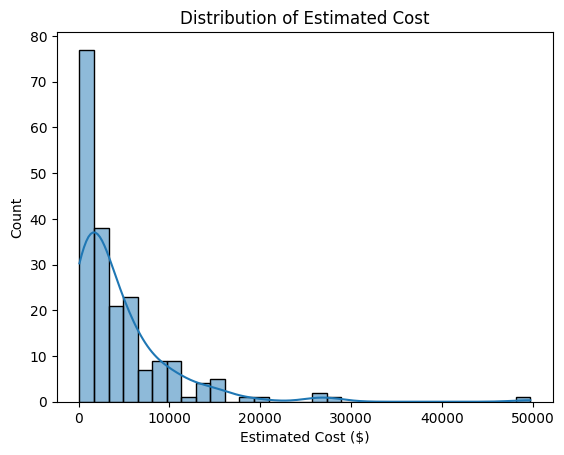

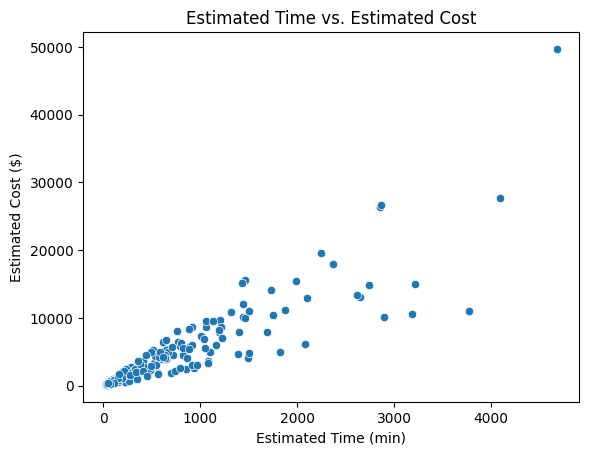

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot the distribution of a numeric column

sns.histplot(df['Estimated Cost ($)'], kde=True)
plt.title('Distribution of Estimated Cost')
plt.show()

# Example: Plot the relationship between two numeric columns
sns.scatterplot(x='Estimated Time (min)', y='Estimated Cost ($)', data=df)
plt.title('Estimated Time vs. Estimated Cost')
plt.show()

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/synthetic_machining_data.csv')

# Display the first few rows of the dataset
print(df.head())


   Material  Dimensions  Estimated Time (min)  Estimated Cost ($)
0  Titanium    54x79x30                   190                2018
1     Steel   165x23x27                   112                 634
2     Steel  127x142x40                   892                5778
3  Titanium   95x196x30                   617                6239
4     Brass  109x169x82                  1444               12055


In [12]:
# Function to calculate volume from dimensions
def calculate_volume(dimensions):
    try:
        # Assuming dimensions are in the format 'lengthxwidthxheight'
        length, width, height = map(float, dimensions.split('x'))
        return length * width * height
    except:
        return None

# Calculate volume for each part
df['Volume'] = df['Dimensions'].apply(calculate_volume)

# Calculate cost per mm³
df['Cost per mm³'] = df['Estimated Cost ($)'] / df['Volume']


The Reasoning Behind Each Feature:

    Cost per mm³: This feature helps understand the cost efficiency of machining different materials. Parts with higher cost per mm³ may be more expensive to machine due to material properties or complexity.

    Surface-Area-to-Volume Ratio: This feature provides insights into the complexity of the part. Higher ratios indicate more complex parts with larger surface areas relative to their volume, which may require more machining time and effort

In [13]:

# Function to calculate surface area from dimensions
def calculate_surface_area(dimensions):
    try:
        # Assuming dimensions are in the format 'lengthxwidthxheight'
        length, width, height = map(float, dimensions.split('x'))
        return 2 * (length * width + length * height + width * height)
    except:
        return None

# Calculate surface area for each part
df['Surface Area'] = df['Dimensions'].apply(calculate_surface_area)

# Calculate surface-area-to-volume ratio
df['Surface-Area-to-Volume Ratio'] = df['Surface Area'] / df['Volume']

In [14]:
# Save the updated DataFrame to a CSV file
df.to_csv('/content/synthetic_machining_data.csv', index=False)

print("Updated dataset with new features saved to cnc_data_with_features.csv")

Updated dataset with new features saved to cnc_data_with_features.csv


   Material  Dimensions  Estimated Time (min)  Estimated Cost ($)     Volume  \
0  Titanium    54x79x30                   190                2018   127980.0   
1     Steel   165x23x27                   112                 634   102465.0   
2     Steel  127x142x40                   892                5778   721360.0   
3  Titanium   95x196x30                   617                6239   558600.0   
4     Brass  109x169x82                  1444               12055  1510522.0   

   Cost per mm³  Surface Area  Surface-Area-to-Volume Ratio  
0      0.015768       16512.0                      0.129020  
1      0.006187       17742.0                      0.173152  
2      0.008010       57588.0                      0.079833  
3      0.011169       54700.0                      0.097923  
4      0.007981       82434.0                      0.054573  


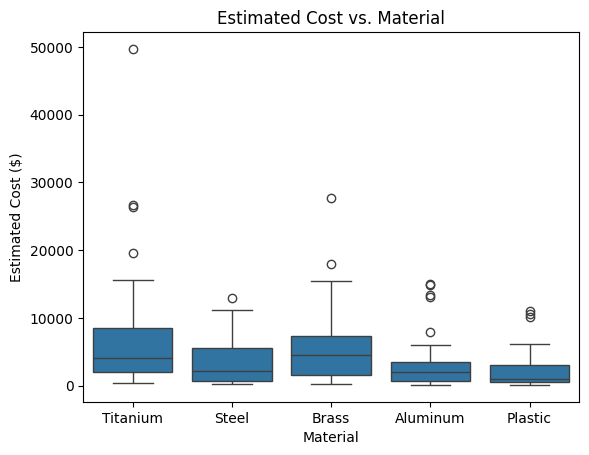

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the updated dataset
df = pd.read_csv('/content/synthetic_machining_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Plot the relationship between Estimated Cost and Material
sns.boxplot(x='Material', y='Estimated Cost ($)', data=df)
plt.title('Estimated Cost vs. Material')
plt.show()

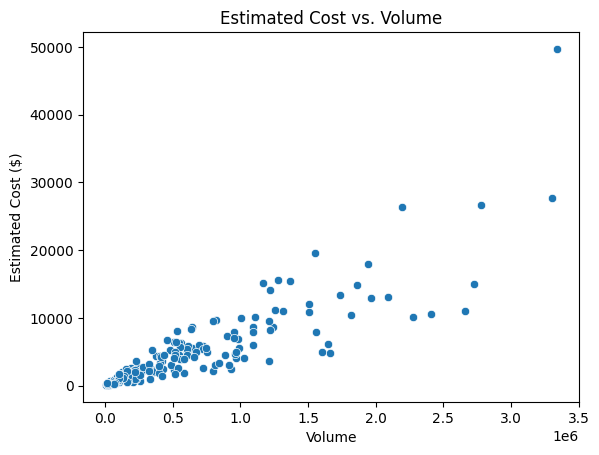

In [16]:
# Plot the relationship between Estimated Cost and Volume
sns.scatterplot(x='Volume', y='Estimated Cost ($)', data=df)
plt.title('Estimated Cost vs. Volume')
plt.show()

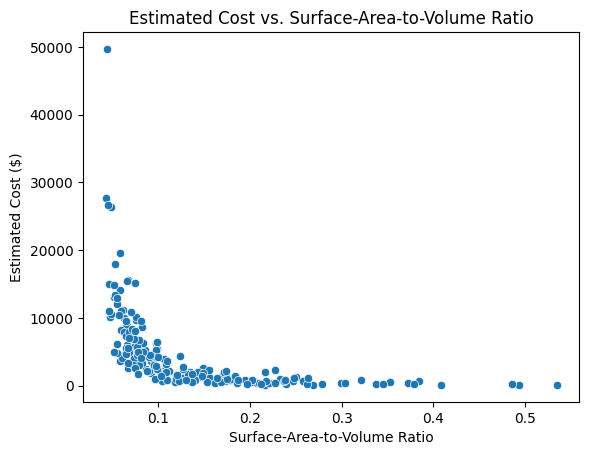

In [17]:
# Plot the relationship between Estimated Cost and Surface-Area-to-Volume Ratio
sns.scatterplot(x='Surface-Area-to-Volume Ratio', y='Estimated Cost ($)', data=df)
plt.title('Estimated Cost vs. Surface-Area-to-Volume Ratio')
plt.show()


In [18]:
# Select features and target variable
features = ['Volume', 'Surface-Area-to-Volume Ratio']
target = 'Estimated Cost ($)'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) # Calculate MSE first
rmse = mse**0.5 # Calculate RMSE by taking the square root of MSE

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 2024.4474999999998
Root Mean Squared Error (RMSE): 4806.098716315552


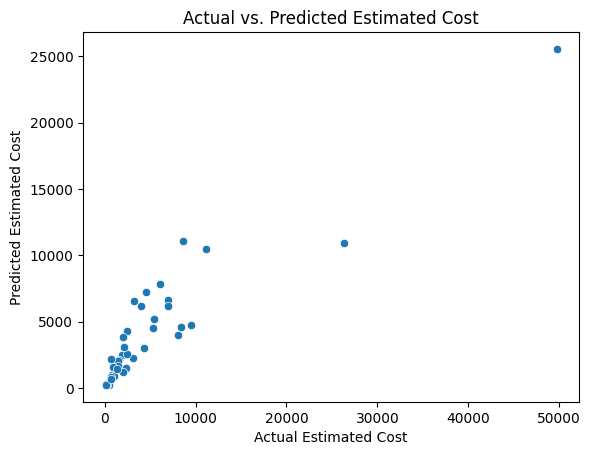

In [21]:
# Plot the relationship between predicted and actual values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Estimated Cost')
plt.ylabel('Predicted Estimated Cost')
plt.title('Actual vs. Predicted Estimated Cost')
plt.show()



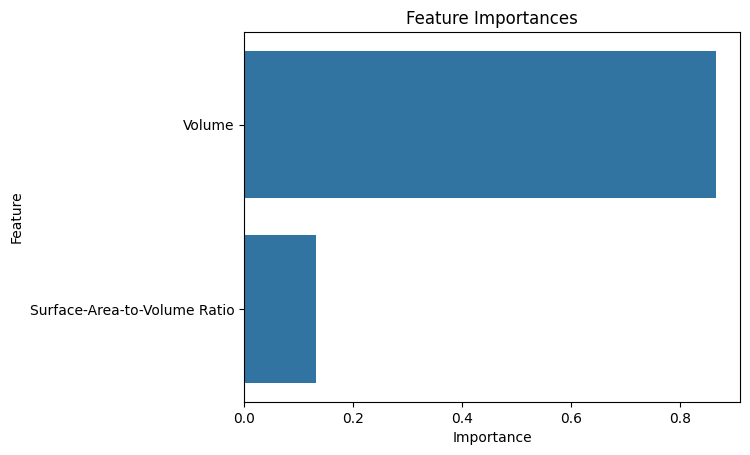

In [22]:
# Get feature importances
importances = model.feature_importances_

#DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


## 📌 Final Analysis & Reflection

### ✅ What Worked Well:
- Random Forest Regressor performed better than Linear Regression in predicting machining costs.
- Engineered features like `Volume` and `Cost per mm³` added meaningful predictive power.
- Visualizations provided useful insights into how features like material and volume influence cost.

### ⚠️ Challenges:
- The dataset lacked surface finish, machining complexity, and toolpath data which could significantly affect cost.
- Material types were limited and sometimes inconsistently labeled.
- No clear way to capture geometric complexity (e.g., holes, pockets, threads) which are crucial in machining.
- The web scraping component was not implemented fully. However, a sample script
 (`sample_scraping.py`) is included to demonstrate the intended approach using BeautifulSoup with
 ethical scraping practices.
### 💡 Future Improvements:
- Use domain knowledge to introduce complexity features (e.g., number of operations, tolerance levels).
- Collect more real-world CNC data via scraping and supplier catalogs.
- Apply techniques like gradient boosting or ensemble learning for better performance.

### 🧠 Reflection:
Working with manufacturing data was both technically and analytically engaging. It required blending engineering intuition with data-driven thinking. I found it interesting how a few physical features could predict cost but also realized how nuanced and variable machining can be across shops and part geometries.
